# X-Ray Baggage Scanner Anomaly Detection



## Project description
This section is acting as a reference for our project, where it provides the needed info to guide our search and selection of the technologies we gonna use through out the project implementation.

## Problem statement
The airport security department submitted a report indicating that the officers who scanning the bags of the passengers wnat to have an abstraction tool that help them catching the unauthorized items faster than the normal scanning. The tool should let the officers focus only on what matter (which is the unauthorized items) so they need to get abstracted image that lighting on the unauthorized or the expected items rather than scanning the whole bag.



## The targted goal
at the end of this project we have to enabel officers to:
- catch the unauthorized items faster
- detecting the unauthorized items and track it

## Required Libraries

In [ ]:
%pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.8 MB/s eta 0:00:00


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


## Data Exploration and Preprocessing


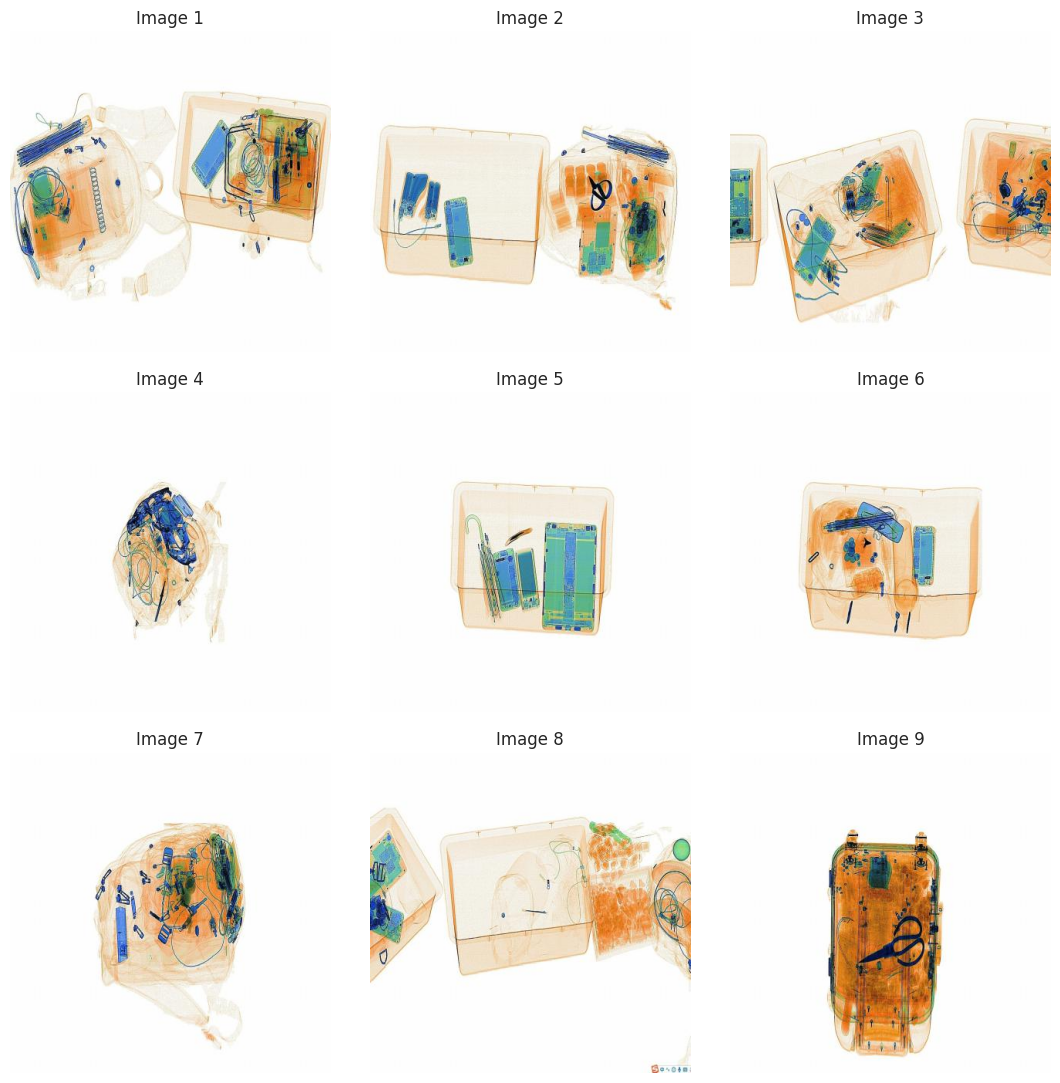

In [ ]:
# Dataset path
Image_dir = '/content/drive/MyDrive/X-ray_baggage_detection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the size of the image
image_path = "/content/drive/MyDrive/X-ray_baggage_detection/train/images/009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a.jpg"
image = cv2.imread(image_path)

if image is not None:
    h, w, c = image.shape
    print(f"The image has dimensions {w}x{h} and {c} channels.")
else:
    print(f"Error: Could not load image from path: {image_path}")

The image has dimensions 416x416 and 3 channels.


In [ ]:
model = YOLO("yolov10s.pt")

100%|██████████| 15.9M/15.9M [00:00<00:00, 166MB/s]



image 1/1 /content/drive/MyDrive/X-ray_baggage_detection/train/images/009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a.jpg: 416x416 (no detections), 10.9ms
Speed: 4.3ms preprocess, 10.9ms inference, 55.8ms postprocess per image at shape (1, 3, 416, 416)


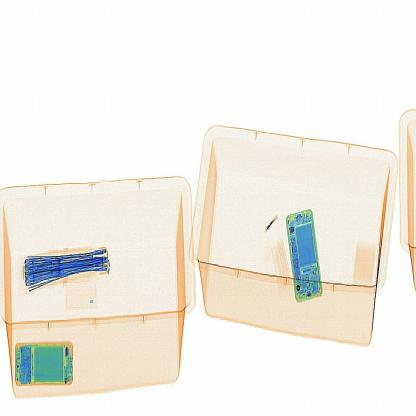

In [ ]:
# Use the model to detect object
image = "/content/drive/MyDrive/X-ray_baggage_detection/train/images/009000_jpg.rf.8c46e1aa5b46a0ad24ee4bcb2945d22a.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
Result_Final_model = model.train(
    data="/content/drive/MyDrive/X-ray_baggage_detection/data.yaml",
    epochs=15,
    batch=-1,
    optimizer='auto',
    imgsz=416,
    degrees=15,
    flipud=0.5,
    fliplr=0.5,
    scale=0.5,
    shear=5,
    perspective=0.001,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    lr0=0.001,
    patience=5,
    mosaic=0.8,
    mixup=0.2,
    cache=True,
    workers=8,
    amp=True,
    project='runs/train',
    name='exp1'
)

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/X-ray_baggage_detection/data.yaml, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov10s.pt, momentum=0.937, mosaic=0.8, multi_scale=False, name=exp12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.001, plots

100%|██████████| 755k/755k [00:00<00:00, 20.3MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

 23        [16, 19, 22]  1   1642670  ultralytics.nn.modules.head.v10Detect        [5, [128, 256, 512]]          
YOLOv10s summary: 234 layers, 8,070,222 parameters, 8,070,206 gradients, 24.8 GFLOPs

Transferred 84/619 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 91.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 17.1 KB)


train: Scanning /content/drive/MyDrive/X-ray_baggage_detection/train/labels... 6181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6181/6181 [41:54<00:00,  2.46it/s]


train: New cache created: /content/drive/MyDrive/X-ray_baggage_detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=416 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.15G reserved, 0.12G allocated, 14.47G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     8070222       10.47         0.648         51.24           nan        (1, 3, 416, 416)                    list
     8070222       20.95         1.111         37.21           nan        (2, 3, 416, 416)                    list
     8070222       41.89         1.730         55.83           nan        (4, 3, 416, 416)                    list
     8070222       83.78         2.946         49.94      

train: Scanning /content/drive/MyDrive/X-ray_baggage_detection/train/labels.cache... 6181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6181/6181 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (3.0GB RAM): 100%|██████████| 6181/6181 [01:12<00:00, 84.79it/s] 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 0.0±0.0 MB/s, size: 14.0 KB)


val: Scanning /content/drive/MyDrive/X-ray_baggage_detection/valid/labels... 1766 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1766/1766 [11:49<00:00,  2.49it/s]


val: New cache created: /content/drive/MyDrive/X-ray_baggage_detection/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.9GB RAM): 100%|██████████| 1766/1766 [00:06<00:00, 266.15it/s]


Plotting labels to runs/train/exp12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.000421875), 111 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/train/exp12
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15       3.5G      6.004      11.19      4.983         36        416: 100%|██████████| 229/229 [01:21<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:10<00:00,  3.18it/s]


                   all       1766       1766      0.324      0.179      0.113     0.0414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      4.08G      4.381       6.37      3.411         42        416: 100%|██████████| 229/229 [01:15<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.60it/s]


                   all       1766       1766      0.462      0.331      0.235     0.0811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      4.13G      4.211      5.167      3.256         45        416: 100%|██████████| 229/229 [01:16<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.66it/s]


                   all       1766       1766      0.542      0.386      0.321      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      4.13G      4.121      4.711      3.195         40        416: 100%|██████████| 229/229 [01:15<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.63it/s]


                   all       1766       1766      0.364      0.449      0.401      0.157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      4.13G       3.99      4.377      3.115         57        416: 100%|██████████| 229/229 [01:15<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.66it/s]


                   all       1766       1766      0.573      0.486      0.471       0.18
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      4.13G      3.672       3.53      3.213         25        416: 100%|██████████| 229/229 [01:11<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  4.01it/s]

                   all       1766       1766      0.473       0.47      0.463       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      4.13G      3.618      3.326      3.177         25        416: 100%|██████████| 229/229 [01:09<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.74it/s]


                   all       1766       1766      0.564      0.511      0.527      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      4.13G      3.594      3.132      3.146         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.61it/s]


                   all       1766       1766      0.571      0.589      0.584      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      4.13G       3.56       3.01      3.112         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  4.01it/s]

                   all       1766       1766      0.589      0.594      0.605      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15      4.17G       3.52      2.922      3.097         25        416: 100%|██████████| 229/229 [01:09<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.73it/s]


                   all       1766       1766      0.605      0.603      0.629      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      4.17G      3.489      2.797      3.057         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.63it/s]


                   all       1766       1766      0.627      0.612      0.632      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      4.17G      3.472      2.678      3.037         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  4.00it/s]

                   all       1766       1766      0.624       0.63      0.644      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      4.17G       3.46       2.62      3.024         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.80it/s]


                   all       1766       1766      0.658      0.649       0.67      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      4.17G      3.408      2.565      2.996         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.65it/s]


                   all       1766       1766      0.644      0.665      0.682      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      4.17G      3.402      2.501      2.994         25        416: 100%|██████████| 229/229 [01:10<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:08<00:00,  3.94it/s]

                   all       1766       1766      0.668      0.671        0.7      0.302



15 epochs completed in 0.342 hours.
Optimizer stripped from runs/train/exp12/weights/last.pt, 16.5MB
Optimizer stripped from runs/train/exp12/weights/best.pt, 16.5MB

Validating runs/train/exp12/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10s summary (fused): 106 layers, 7,219,935 parameters, 0 gradients, 21.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.55it/s]


                   all       1766       1766      0.669      0.671        0.7      0.301
                     0        391        391      0.756      0.887      0.884      0.415
                     1        389        389      0.703       0.71      0.757      0.333
                     2        225        225      0.531      0.307      0.381      0.138
                     3        366        366      0.681      0.579      0.647      0.282
                     4        395        395      0.674      0.871      0.833       0.34
Speed: 0.1ms preprocess, 2.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/train/exp12


In [ ]:
# Perform validation on the trained model
# This evaluates the model's performance on the validation dataset
val_results = model.val(
    data="/content/drive/MyDrive/X-ray_baggage_detection/data.yaml", # Path to the dataset configuration file
    imgsz=416, # Image size for validation
    batch=16, # Batch size for inference
    device=0 # Device to run validation on (GPU 0 in this case)
)

# Print the validation results
print("Validation Results:")
# mAP@50: Mean Average Precision at an IoU threshold of 0.50
print(f"mAP@50: {val_results.box.map50:.4f}")
# mAP@50:95: Mean Average Precision averaged over IoU thresholds from 0.50 to 0.95
print(f"mAP@50:95: {val_results.box.map:.4f}")

# Explanation of Precision and Recall (extracted from the validation output)
# Precision: The ability of the model to avoid false positives.
# Recall: The ability of the model to find all the relevant objects in an image.

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 8.0±3.5 MB/s, size: 16.0 KB)


val: Scanning /content/drive/MyDrive/X-ray_baggage_detection/valid/labels.cache... 1766 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1766/1766 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.9GB RAM): 100%|██████████| 1766/1766 [00:06<00:00, 254.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:11<00:00,  9.52it/s]


                   all       1766       1766      0.669      0.671        0.7      0.301
                     0        391        391      0.756      0.888      0.884      0.415
                     1        389        389      0.701      0.707      0.755      0.333
                     2        225        225      0.532      0.307      0.383      0.137
                     3        366        366      0.681      0.579      0.647      0.281
                     4        395        395      0.674      0.873      0.833      0.341
Speed: 0.2ms preprocess, 3.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/train/exp123
Validation Results:
mAP@50: 0.7004
mAP@50:95: 0.3014


In [ ]:
model.export(
    format="onnx",
    imgsz=416,
    dynamic=True,
    simplify=True
)

print("Model exported to ONNX format.")

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/train/exp12/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 300, 6) (15.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 9.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 15.4s, saved as 'runs/train/exp12/weights/best.onnx' (27.7 MB)

Export complete (15.9s)
Results saved to /content/runs/train/exp12/weights
Predict:         yolo predict task=detect model=runs/train/exp12/weights/best.onnx imgsz=416  
Validate:        yolo va

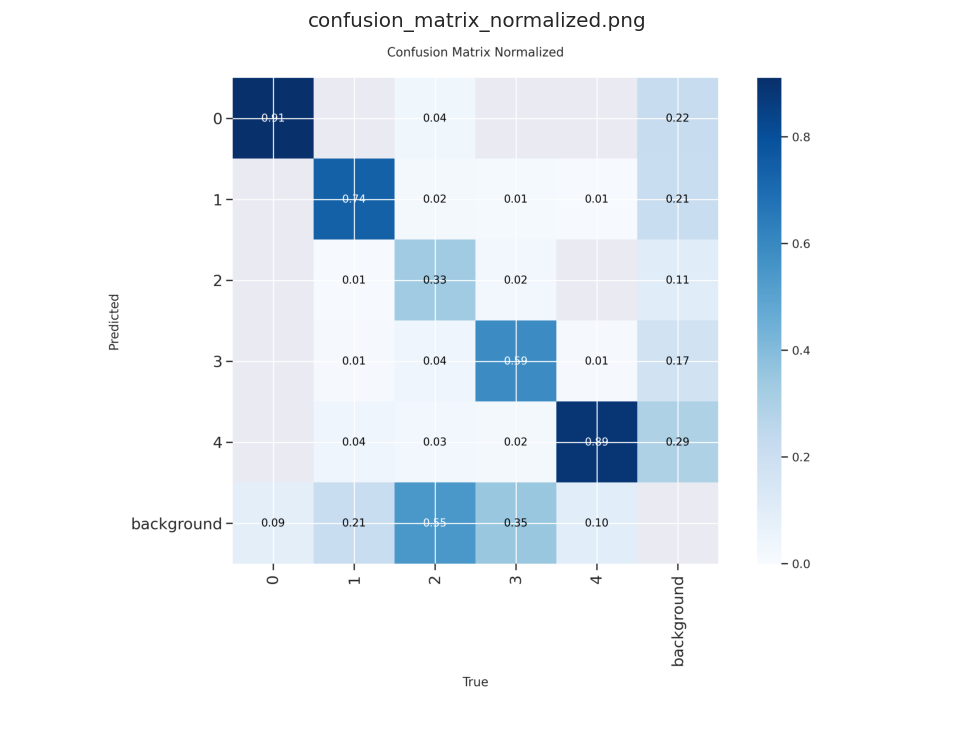

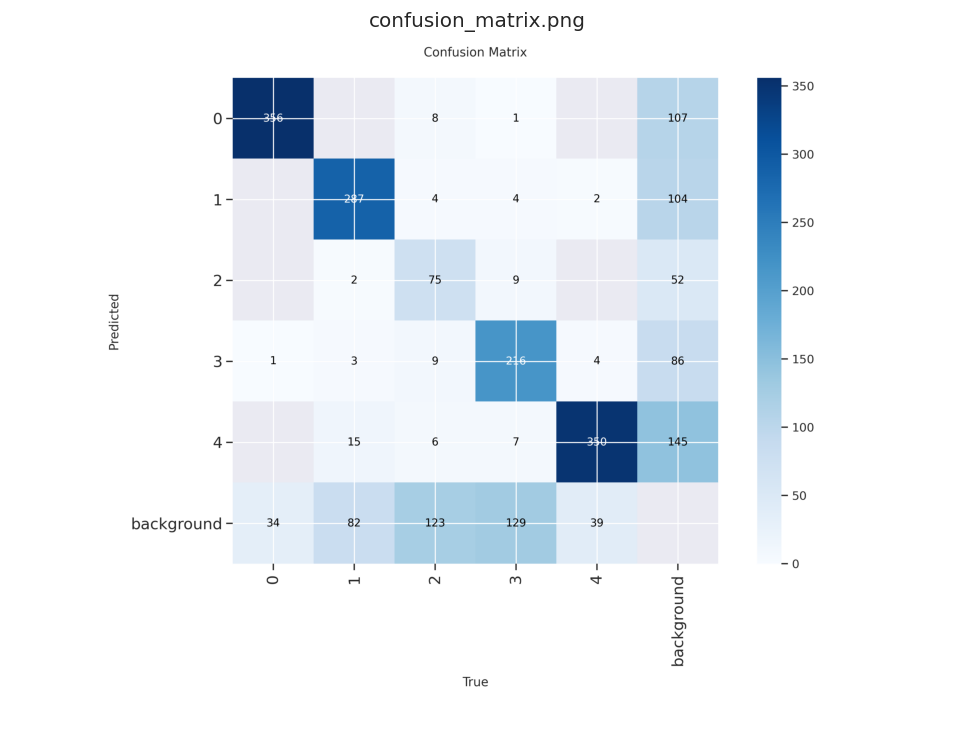

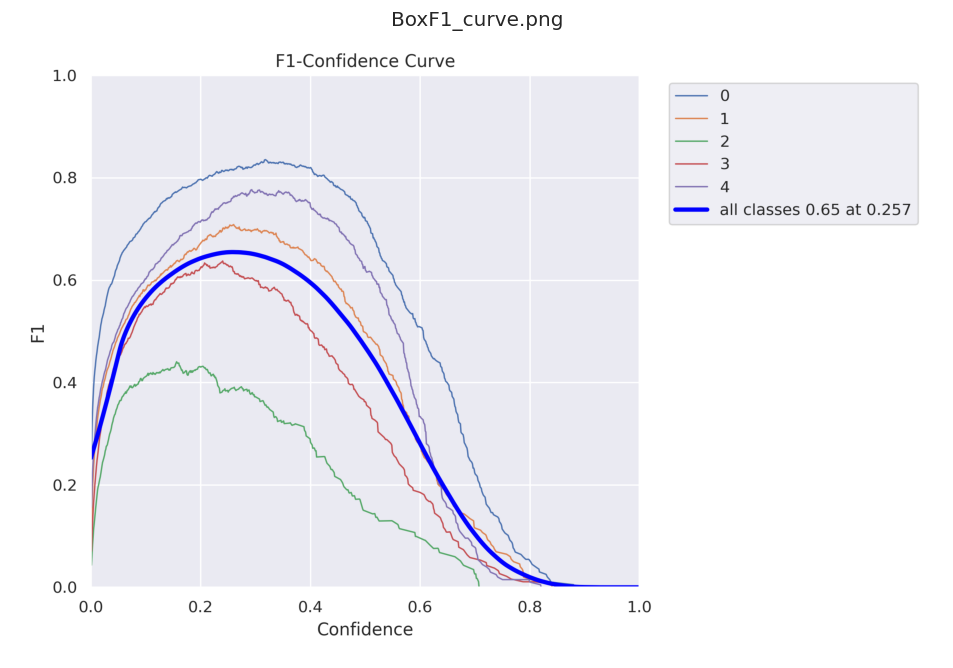

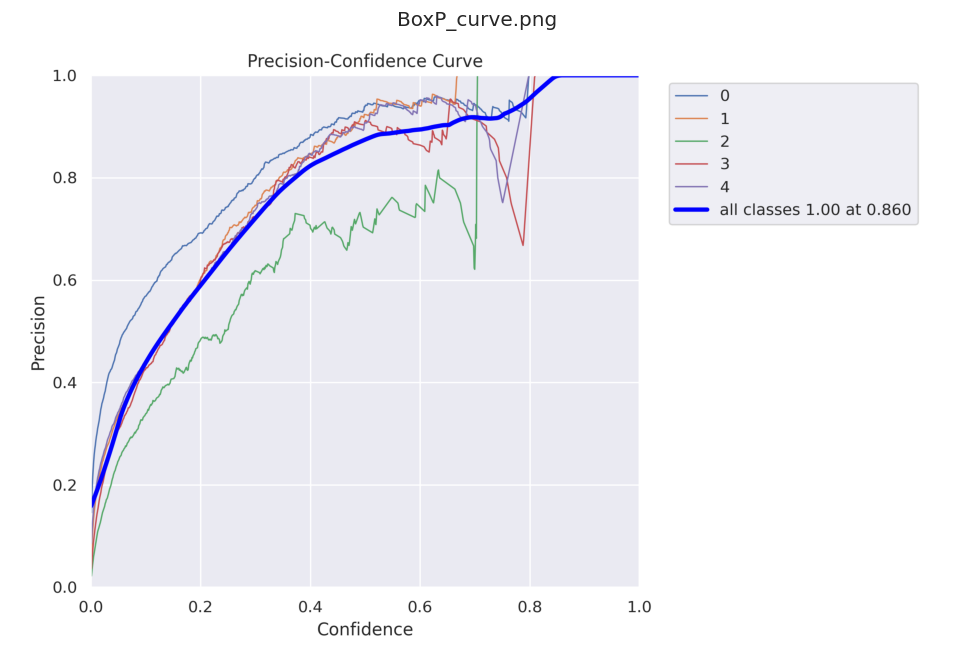

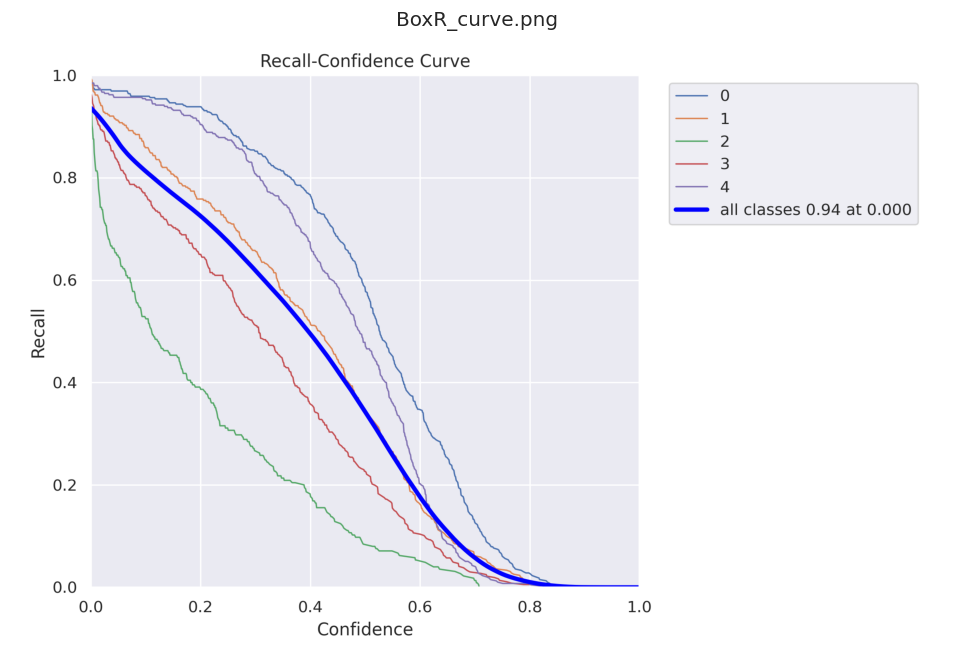

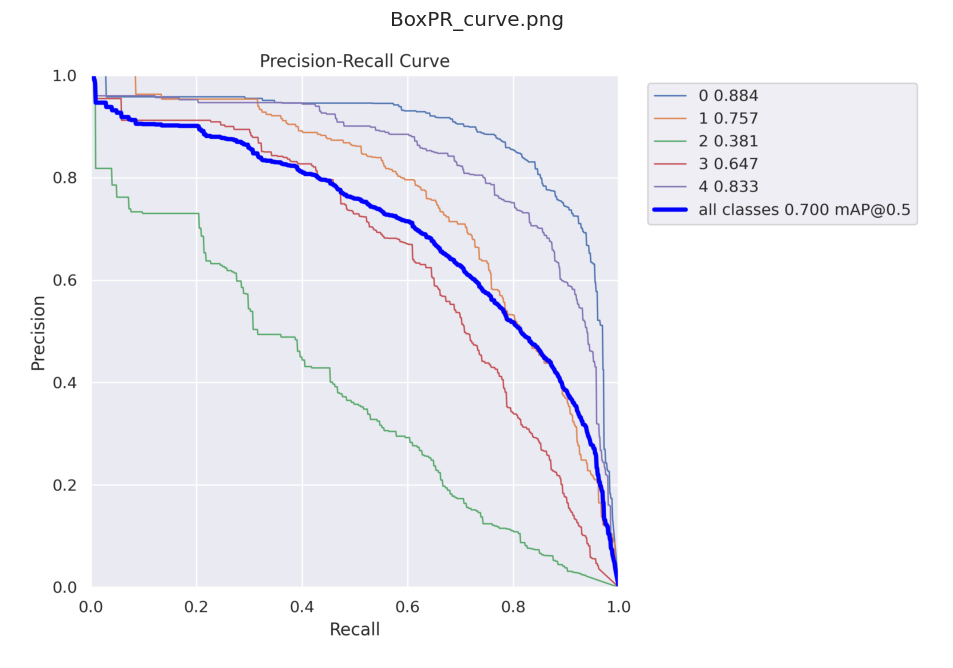

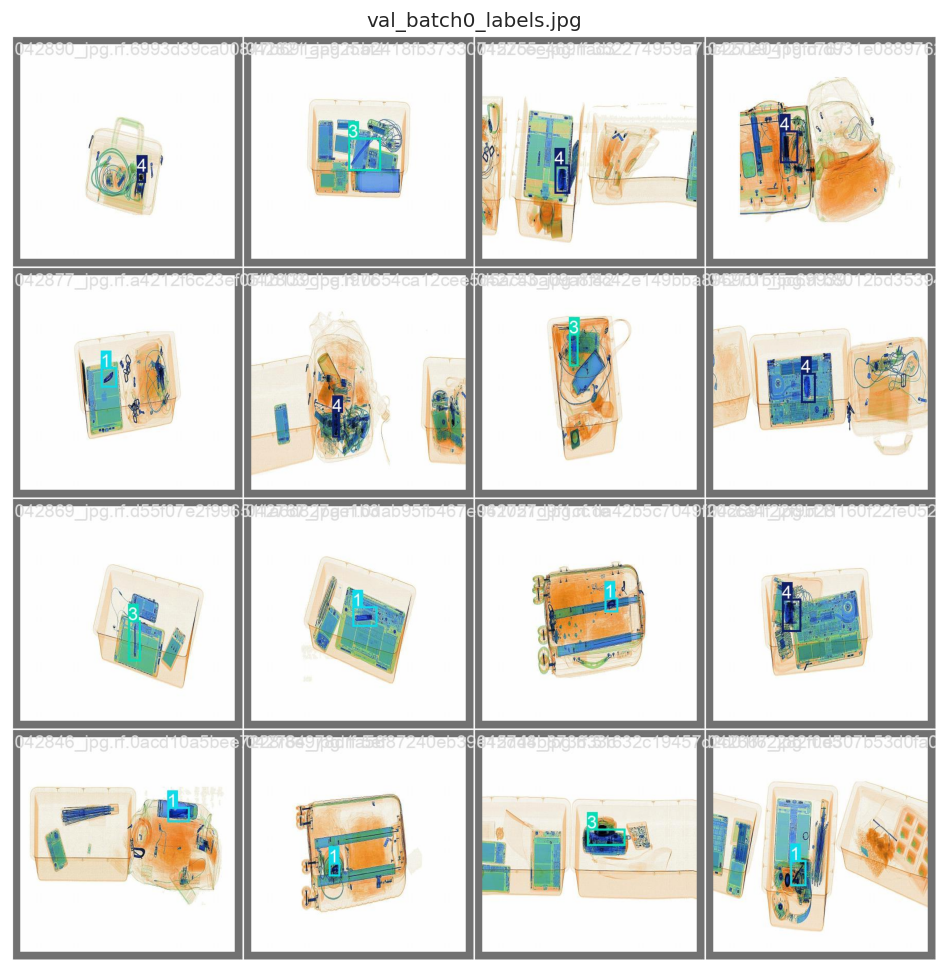


Displaying single image prediction from: /content/runs/predict/single_image_exp2/009004_jpg.rf.0f740b5e6ccaea6cc4179f6b479938a1.jpg
Error: Could not find the single image prediction file at /content/runs/predict/single_image_exp2/009004_jpg.rf.0f740b5e6ccaea6cc4179f6b479938a1.jpg


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import display, Image

def display_images(post_training_files_path, image_files):
    """
    Displays images from a specified directory.

    Args:
        post_training_files_path (str): The path to the directory containing the images.
        image_files (list): A list of image filenames to display.
    """
    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)

        if img is not None:
            # Convert BGR to RGB for displaying with matplotlib
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 10), dpi=120)
            plt.imshow(img)
            plt.title(image_file) # Add title to show which image is displayed
            plt.axis('off')
            plt.show()
        else:
            print(f"Error: Could not load image from path: {image_path}")


# List of image files to display from the training results
image_files = [
    'confusion_matrix_normalized.png',
    'confusion_matrix.png',
    'BoxF1_curve.png',
    'BoxP_curve.png',
    'BoxR_curve.png',
    'BoxPR_curve.png',
    'val_batch0_labels.jpg'
]

# Path to the directory containing the images.
# Ensure this path is correct based on your training run output directory.
post_training_files_path = '/content/runs/train/exp12'

# Display the images
display_images(post_training_files_path, image_files)

# Also display the single image prediction result
single_predict_path = "/content/runs/predict/single_image_exp2/009004_jpg.rf.0f740b5e6ccaea6cc4179f6b479938a1.jpg"

print(f"\nDisplaying single image prediction from: {single_predict_path}")
try:
    display(Image(filename=single_predict_path))
except FileNotFoundError:
    print(f"Error: Could not find the single image prediction file at {single_predict_path}")

In [ ]:
Result_Final_model = pd.read_csv('runs/train/exp12/results.csv')
Result_Final_model.tail(10)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
5,6,515.097,3.67207,3.53023,3.21263,0.47336,0.46957,0.46291,0.19013,3.87868,3.43435,3.07098,0.000744,0.000744,0.000744
6,7,594.533,3.61770,3.32563,3.17744,0.56401,0.51110,0.52742,0.21463,3.89174,3.17253,3.06571,0.000671,0.000671,0.000671
7,8,674.592,3.59429,3.13184,3.14563,0.57070,0.58939,0.58355,0.23672,3.90683,2.88157,3.04094,0.000598,0.000598,0.000598
8,9,753.837,3.55981,3.01045,3.11182,0.58887,0.59406,0.60538,0.25268,3.81168,2.84884,2.99757,0.000524,0.000524,0.000524
9,10,833.379,3.52009,2.92180,3.09654,0.60469,0.60287,0.62892,0.26367,3.79286,2.75410,2.99343,0.000451,0.000451,0.000451
10,11,913.378,3.48874,2.79749,3.05677,0.62651,0.61165,0.63236,0.26621,3.77438,2.72686,2.96296,0.000378,0.000378,0.000378
11,12,992.428,3.47176,2.67787,3.03689,0.62359,0.63017,0.64434,0.27051,3.79575,2.70635,2.98627,0.000304,0.000304,0.000304
12,13,1072.680,3.46022,2.61991,3.02424,0.65754,0.64873,0.66961,0.28466,3.75002,2.56081,2.93617,0.000231,0.000231,0.000231
13,14,1152.540,3.40820,2.56471,2.99629,0.64388,0.66470,0.68185,0.28841,3.72541,2.51238,2.93287,0.000158,0.000158,0.000158
14,15,1232.030,3.40152,2.50117,2.99403,0.66829,0.67096,0.70024,0.30160,3.69556,2.45203,2.91335,0.000084,0.000084,0.000084


##  Model Evaluation

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/drive/MyDrive/X-ray_baggage_detection/test/images/009024_jpg.rf.6de3f50660b30e85323eb009190d7747.jpg"

single_result = model.predict(
    source=image_path,
    imgsz=416,
    conf=0.25,
    iou=0.45,
    save=True,
    project="runs/predict",
    name="single_image_exp"
)


image 1/1 /content/drive/MyDrive/X-ray_baggage_detection/test/images/009024_jpg.rf.6de3f50660b30e85323eb009190d7747.jpg: 416x416 (no detections), 14.6ms
Speed: 1.7ms preprocess, 14.6ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/predict/single_image_exp4


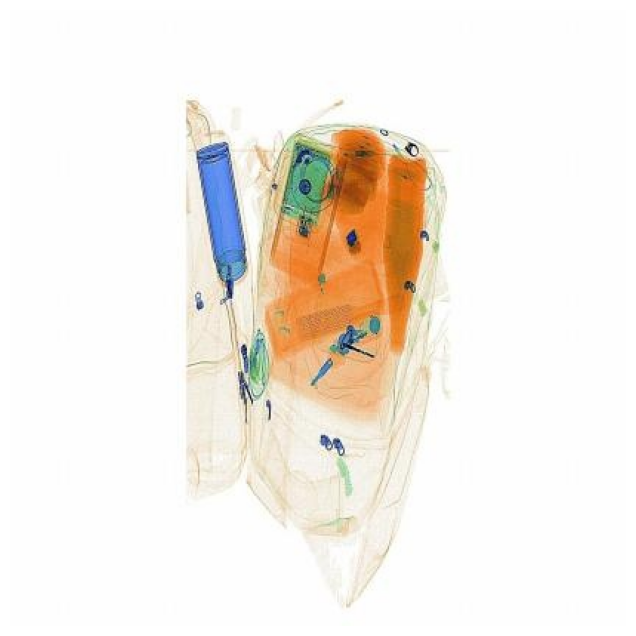

 runs/predict/single_image_exp4/009024_jpg.rf.6de3f50660b30e85323eb009190d7747.jpg


In [ ]:
saved_image_path = "runs/predict/single_image_exp4/009024_jpg.rf.6de3f50660b30e85323eb009190d7747.jpg"

img = Image.open(saved_image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Eksenleri kapat
plt.show()

print("", saved_image_path)